In [3]:
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap

In [4]:
labelsExpand = ['(2,10)',   '(2,20)',   '(2,40)',  '(2,80)',  '(2,120)','(2,160)',
            '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,80)', '(40,120)','(40,160)',
            '(80,120)','(80,160)',
            '(120,160)']
labelsShrink = ['(10,2)', '(20,2)', '(40,2)', '(80,2)', '(120,2)', '(160,2)',
            '(20,10)', '(40,10)', '(80,10)', '(120,10)', '(160,10)', 
            '(40,20)', '(80,20)', '(120,20)', '(160,20)',
            '(80,40)','(120,40)', '(160,40)',
            '(120,80)', '(160,80)',
            '(160,120)']
colors_m = ['green','darkgreen','red','darkred','mediumseagreen','seagreen','palegreen','springgreen','indianred','firebrick','darkgoldenrod','saddlebrown']
linestyle_m = ['-', '--', '-.', ':']
markers_m = ['.','v','s','p', 'h','d','X','P','^']

EXP - T Maleabilidad

In [5]:
extra_name='T_malleability'
used_direction='e'
r_bcols = [1.33117, 2.839943, 2.745309, 2.884613, 2.978012, 3.070871, 4.370124, 3.991864, 3.798866, 3.364302, 3.316498, 5.262375, 4.888182, 4.577548, 4.648777, 5.423463, 5.104321, 5.090397, 5.777117, 5.590401, 5.825187]
r_bp2ps = [1.408168, 2.950955, 2.846971, 2.756328, 2.82615, 3.068997, 4.643723, 3.729592, 3.536372, 3.406829, 3.321297, 5.090353, 4.840466, 4.727813, 4.689384, 5.203662, 5.042243, 5.090547, 5.650905, 5.445521, 5.860187]
r_mcols = [1.615102, 1.942402, 1.80284, 2.291742, 2.026953, 2.241573, 1.229344, 2.062607, 1.680495, 1.82199, 2.146835, 1.740562, 2.071093, 1.889371, 2.233124, 1.604567, 1.647358, 1.923606, 1.593517, 1.81128, 1.895322]
r_mp2ps = [1.469169, 1.845029, 2.403178, 2.103092, 1.944023, 2.287735, 1.320511, 1.613023, 1.907762, 1.753278, 2.08695, 1.62315, 1.750476, 1.905997, 2.302822, 1.975584, 1.552925, 1.923614, 1.550494, 1.742948, 1.800115]
r_bcola = [2.038738, 4.089111, 3.482711, 4.018232, 3.750907, 4.13713, 6.563361, 7.102251, 6.47169, 7.492571, 7.546002, 10.552077, 11.013176, 10.994989, 11.216794, 12.091918, 12.197829, 11.813583, 12.975111, 12.976981, 13.052245]
r_bcolt = [2.050947, 3.869894, 3.98134, 4.273813, 3.900573, 4.018491, 7.556105, 7.345819, 7.953121, 6.270779, 7.722063, 13.830719, 13.323709, 13.450889, 13.054789, 16.628925, 16.089416, 17.152672, 17.645021, 17.499142, 19.570827]
r_bp2pa = [2.063664, 3.829703, 3.91306, 3.624289, 3.579214, 3.719182, 5.680034, 7.624907, 7.265138, 7.497921, 6.814596, 10.251469, 10.946757, 11.474794, 10.696146, 12.16077, 12.260034, 12.102698, 12.386869, 12.454225, 13.783531]
r_bp2pt = [2.02144, 3.89958, 3.988966, 3.669442, 3.714323, 4.584173, 7.536274, 6.134638, 8.982006, 7.297809, 7.460649, 13.481303, 13.339197, 14.126408, 13.652284, 17.265177, 16.940573, 17.119716, 17.263249, 17.518617, 18.385186]
r_mcola = [3.445992, 3.618966, 3.328695, 3.654761, 3.374995, 3.703013, 1.590676, 2.084167, 2.503285, 2.237429, 2.719622, 2.019574, 1.956794, 2.36734, 2.696985, 2.102067, 2.006561, 2.406975, 1.950222, 2.062532, 2.245545]
r_mcolt = [2.175461, 2.969844, 2.903801, 3.518951, 3.091789, 3.470252, 2.029309, 2.773385, 2.576642, 2.598992, 2.932816, 2.547626, 2.507993, 2.270902, 2.56406, 2.417526, 2.262839, 2.315591, 2.18109, 2.492345, 2.53802]
r_mp2pa = [3.002679, 3.302335, 3.169196, 3.257468, 3.374373, 3.533412, 1.579097, 2.294847, 2.185527, 2.189175, 2.421253, 2.210564, 2.378498, 2.333268, 2.460545, 2.009611, 1.949841, 2.283407, 1.860751, 2.307853, 2.152027]
r_mp2pt = [2.68859, 2.907689, 3.046802, 3.343146, 3.08177, 3.284599, 2.178305, 2.45849, 2.827955, 2.573031, 2.818442, 2.14197, 2.161146, 2.278711, 2.641237, 2.645742, 2.300098, 2.439624, 2.223849, 2.362467, 2.592961]

In [6]:
e_bcols = [1.582728, 3.541214, 3.208767, 3.072204, 3.287184, 3.15786, 4.697912, 3.981272, 3.414445, 3.335912, 3.23023, 5.132726, 4.557854, 4.645913, 4.40223, 5.143675, 5.000631, 4.777128, 5.522515, 5.376905, 5.750084]
e_bp2ps = [1.620807, 3.125477, 2.940658, 2.936724, 3.271467, 3.201153, 4.163286, 3.717093, 3.514315, 3.262477, 3.249927, 4.893904, 4.667941, 4.562801, 4.698906, 5.121413, 5.055561, 4.968335, 5.654186, 5.493723, 5.836845]
e_mcols = [2.180938, 2.31705, 2.123476, 2.233124, 2.203716, 2.612835, 1.78206, 1.616347, 1.894065, 1.705814, 2.148576, 1.549562, 1.678666, 1.783265, 2.102774, 1.518142, 1.673871, 1.876515, 1.607498, 1.856632, 1.652016]
e_mp2ps = [3.33758, 3.101403, 2.63488, 2.258862, 2.226487, 2.16224, 2.217792, 1.943842, 1.93068, 1.734196, 1.823301, 1.636648, 1.97338, 1.76848, 1.887141, 1.648309, 1.567386, 1.706538, 1.54376, 1.669437, 1.579588]
e_bcola = [2.665559, 4.707724, 4.012614, 4.131424, 4.051523, 4.402319, 7.876453, 5.445525, 7.017618, 6.209271, 7.734051, 10.91587, 10.875146, 10.776543, 10.771901, 12.073464, 13.028332, 11.990859, 13.274174, 12.789037, 13.471901]
e_bcolt = [2.379021, 4.965284, 4.840988, 4.570896, 4.703948, 4.642721, 7.96221, 8.175644, 7.370507, 7.326526, 8.34401, 15.695959, 16.46014, 15.518373, 15.592659, 18.50009, 17.469681, 17.583055, 18.608619, 18.51814, 19.842844]
e_bp2pa = [2.723122, 4.628887, 4.328712, 3.968845, 3.900534, 3.771023, 8.284928, 7.605093, 7.198587, 4.790171, 7.26776, 11.096418, 10.751626, 10.622704, 10.745759, 11.849798, 12.309258, 12.666693, 12.928639, 12.781234, 13.01795]
e_bp2pt = [2.670217, 5.057649, 4.69636, 4.51578, 4.588661, 4.532639, 9.008979, 5.181379, 5.270224, 6.976373, 8.273318, 15.972499, 15.537048, 15.52237, 15.921397, 17.808095, 17.961398, 17.818081, 18.718242, 17.89078, 19.821144]
e_mcola = [2.945621, 2.787558, 3.120218, 2.781259, 2.769397, 3.460059, 1.605032, 1.943523, 2.147977, 1.840966, 2.118014, 1.770271, 1.808707, 1.914638, 2.117079, 1.694133, 1.823706, 1.864788, 1.70262, 1.787792, 1.709569]
e_mcolt = [3.006231, 3.296326, 3.918953, 3.505513, 3.629655, 3.811826, 2.513261, 2.3889, 2.453396, 2.286709, 2.509381, 2.037071, 2.16185, 2.225967, 2.167232, 2.326547, 2.255115, 2.319547, 2.307063, 2.252443, 2.333409]
e_mp2pa = [3.060662, 3.049529, 2.856751, 2.701555, 2.791746, 2.772728, 1.909148, 1.834223, 1.899925, 1.911785, 1.883177, 1.634552, 1.805242, 1.867238, 2.037164, 1.892163, 1.740955, 1.762025, 1.616585, 1.784325, 1.844588]
e_mp2pt = [3.089477, 4.107306, 3.947711, 3.737971, 3.479826, 3.236083, 2.760719, 2.651929, 2.640079, 2.564748, 2.751001, 2.436709, 2.259354, 2.116777, 2.443067, 2.415971, 2.334418, 2.600437, 2.2877, 2.585721, 2.511545]

In [12]:
extra_name='T_malleability'
used_direction='s'
r_bcols = [2.029832, 4.002575, 4.17269, 3.812689, 5.130576, 4.310145, 4.714781, 4.245212, 4.272538, 4.279389, 4.212212, 5.602352, 5.71326, 5.389531, 5.233519, 5.598124, 5.075607, 5.504713, 5.95693, 5.610863, 5.806923]
r_bp2ps = [3.312553, 4.945136, 5.291309, 4.921148, 4.961572, 4.716918, 4.694367, 4.269783, 4.375902, 4.245258, 4.387322, 5.603281, 5.752968, 5.242866, 5.325701, 5.680896, 5.553088, 5.317704, 5.859378, 6.053098, 5.996827]
r_mcols = [1.296889, 1.326366, 3.17955, 3.821113, 3.567873, 3.447901, 0.459503, 1.030644, 1.178738, 1.312072, 1.316192, 0.769729, 0.998362, 1.050758, 1.03917, 0.706307, 0.850669, 0.746296, 0.548069, 0.530595, 0.542886]
r_mp2ps = [1.462632, 1.339026, 4.173841, 3.870665, 3.976887, 3.819902, 0.457045, 0.956598, 1.183855, 1.317615, 1.349066, 0.884713, 1.008807, 1.039591, 1.081519, 0.724115, 0.735972, 0.739657, 0.47065, 0.511422, 0.421544]
r_bcola = [2.889902, 4.862715, 4.716711, 4.42393, 5.267806, 4.533056, 7.18292, 5.548504, 4.769133, 4.738707, 4.611994, 8.624546, 6.843158, 6.353655, 6.226882, 9.324679, 7.848706, 7.529337, 11.006673, 9.650434, 12.090074]
r_bcolt = [2.462899, 7.121452, 6.940454, 6.145757, 7.833632, 6.46301, 8.997101, 8.1596, 6.938076, 6.479658, 6.229191, 11.096724, 9.196484, 7.903364, 7.54433, 11.52006, 9.822301, 8.996561, 14.492222, 12.533223, 16.092405]
r_bp2pa = [2.804982, 4.72429, 3.641723, 3.913319, 4.26872, 4.333034, 7.200586, 5.679234, 4.912159, 4.70511, 5.128397, 8.271856, 7.184707, 6.351429, 6.045712, 9.139056, 7.697729, 7.343152, 10.780554, 9.718548, 12.250863]
r_bp2pt = [3.581688, 7.315654, 6.922636, 6.967356, 7.100215, 6.521511, 9.520726, 8.136163, 6.640989, 6.407816, 6.017884, 11.214756, 8.479604, 7.845109, 7.29045, 11.771785, 10.00131, 9.197792, 14.0485, 12.606346, 16.228427]
r_mcola = [1.621169, 1.519568, 2.584717, 3.728039, 3.610011, 3.480483, 0.631794, 1.213573, 1.565538, 1.724049, 1.678989, 1.014792, 1.557267, 1.648172, 1.783855, 1.262183, 1.252234, 1.49219, 0.911314, 0.916136, 0.726225]
r_mcolt = [1.819709, 1.556778, 4.744357, 4.298798, 4.277384, 4.316419, 0.805209, 1.390316, 1.912741, 2.026718, 1.827485, 1.355492, 1.734479, 1.813984, 1.83161, 1.414544, 1.337777, 1.679387, 1.150419, 1.258976, 1.0294]
r_mp2pa = [1.611873, 1.528418, 2.222706, 2.303941, 2.317345, 2.444907, 0.648476, 1.075178, 1.258223, 1.435047, 1.725063, 1.087963, 1.270515, 1.624594, 1.435208, 1.161804, 1.202161, 1.260304, 1.130213, 0.910073, 0.742987]
r_mp2pt = [1.985303, 1.850385, 4.30415, 4.455139, 4.66277, 4.368557, 0.807624, 1.541244, 2.03459, 2.150588, 2.128791, 1.227589, 1.770872, 1.824874, 1.857052, 1.563393, 1.534385, 1.648849, 1.08535, 1.061561, 1.04103]

In [13]:
e_bcols = [1.792957, 3.470937, 4.508782, 3.677384, 4.855738, 4.305935, 4.616455, 4.209136, 4.06651, 4.064435, 4.254576, 5.584074, 5.338783, 5.205751, 5.424272, 5.355034, 5.25741, 5.290692, 5.570286, 5.733224, 5.811704]
e_bp2ps = [3.050004, 4.439026, 4.805191, 4.996433, 4.797096, 4.438406, 4.377537, 4.080577, 4.0337, 4.202152, 4.212358, 5.281094, 5.32586, 5.012324, 4.972084, 5.497431, 5.376747, 5.298405, 5.671158, 5.606849, 5.861844]
e_mcols = [1.320023, 1.277666, 2.842671, 3.017197, 3.09832, 3.059059, 0.376986, 0.958975, 1.144831, 1.274653, 1.334458, 0.724643, 0.900007, 0.968964, 1.097029, 0.823958, 0.687361, 0.752731, 0.41616, 0.577923, 0.441591]
e_mp2ps = [2.492573, 1.892089, 3.331879, 3.397327, 3.352351, 3.295593, 0.969629, 1.082329, 1.122407, 1.234336, 1.373739, 0.743478, 1.085276, 1.006346, 1.153274, 0.769976, 0.721495, 0.859357, 0.520264, 0.511073, 0.600801]
e_bcola = [2.087089, 4.779094, 4.939276, 4.509458, 4.710538, 4.805538, 8.215435, 6.847639, 5.617774, 5.145923, 5.302533, 8.687307, 7.447319, 7.011477, 6.812716, 9.532056, 8.150733, 7.757136, 11.143499, 10.054349, 12.248547]
e_bcolt = [2.197694, 7.192972, 7.909022, 7.301016, 7.886833, 7.653179, 11.205588, 7.891581, 7.448533, 6.771227, 6.614261, 11.343965, 9.313625, 8.066579, 7.965153, 12.513005, 10.575432, 9.618308, 15.341294, 13.377183, 16.98651]
e_bp2pa = [2.054401, 5.127342, 4.901832, 3.868711, 4.299222, 4.766293, 8.129135, 6.577724, 5.522549, 5.472794, 5.074618, 8.737227, 7.377733, 6.892918, 6.792298, 9.183765, 8.666331, 7.650235, 11.066463, 9.80703, 12.098292]
e_bp2pt = [3.352147, 9.037659, 8.02675, 8.160874, 8.487597, 7.755382, 11.441276, 8.768152, 7.347693, 6.825133, 6.510539, 11.454865, 9.323985, 8.132071, 7.784634, 12.851987, 10.356594, 9.727511, 14.721953, 13.484104, 17.008135]
e_mcola = [1.537456, 1.417474, 2.309059, 3.345546, 3.343161, 3.304527, 0.541737, 0.976909, 1.373545, 1.411259, 1.676344, 0.751531, 1.115835, 1.31444, 1.415454, 1.116551, 0.975429, 1.063503, 0.930037, 0.772047, 0.832388]
e_mcolt = [1.676212, 1.553382, 3.777532, 3.780641, 4.583298, 3.841612, 0.710808, 1.312166, 1.517845, 1.964698, 1.975179, 1.050512, 1.654913, 1.613324, 1.628873, 1.142828, 1.404471, 1.558514, 1.155985, 1.266284, 1.102895]
e_mp2pa = [1.605843, 1.446297, 2.003533, 2.071309, 2.104444, 2.26628, 0.514149, 0.900801, 1.084348, 1.142658, 1.495601, 0.856418, 1.07964, 1.03857, 1.318004, 0.942894, 0.950277, 0.858453, 0.753929, 0.795575, 0.715199]
e_mp2pt = [2.945301, 3.545449, 5.025505, 4.721071, 4.534212, 4.372069, 1.76273, 1.818672, 2.198566, 2.067327, 2.032403, 1.107936, 1.571628, 1.825439, 1.854953, 1.22133, 1.376236, 1.488085, 1.146556, 1.145898, 1.214226]

In [15]:
extra_name='T_total'
used_direction='e'
r_bcols = [361.352938, 345.388107, 134.498552, 356.045042, 141.330604, 123.359693, 399.86988, 145.224219, 120.444334, 134.863004, 400.405337, 144.709948, 125.358569, 133.51356, 132.389767, 400.680063, 142.981546, 121.882686, 138.608622, 137.507386, 131.56386]
r_bp2ps = [415.667817, 345.584176, 133.261216, 356.879123, 142.746971, 126.726705, 400.635285, 146.760437, 121.496508, 129.794071, 401.61571, 143.425077, 122.689273, 141.229556, 135.995102, 402.093733, 143.297502, 120.604844, 131.359716, 132.609394, 135.982361]
r_mcols = [377.230362, 356.038485, 138.362015, 352.052038, 139.514097, 122.328242, 351.1479, 139.413431, 116.900481, 135.237109, 402.79597, 139.970688, 118.515419, 134.416682, 123.743825, 406.999808, 143.767659, 125.267586, 137.310157, 132.965679, 132.780886]
r_mp2ps = [429.02278, 358.560274, 138.170272, 354.212558, 139.364364, 121.843162, 400.928292, 142.647979, 118.197956, 136.358464, 400.874579, 139.335011, 117.734457, 132.065356, 130.223159, 408.07741, 142.840977, 119.951089, 131.82486, 132.428085, 130.886239]
r_bcola = [422.015817, 350.408977, 136.286062, 366.917546, 143.711698, 129.0897, 361.395738, 142.397439, 128.251332, 139.33649, 409.761911, 144.946341, 132.210365, 149.856866, 134.208945, 415.526023, 145.581966, 126.102311, 140.893401, 148.918461, 141.807584]
r_bcolt = [416.417218, 345.829829, 135.552403, 354.617145, 146.726201, 141.129263, 352.509234, 148.071621, 133.719683, 150.784626, 406.277764, 148.153029, 133.569953, 151.904042, 141.902558, 402.879388, 145.778084, 139.925905, 145.32985, 145.042009, 156.43128]
r_bp2pa = [415.619338, 347.23318, 137.853212, 355.4769, 143.83764, 132.968324, 351.814728, 141.576996, 125.126663, 145.492502, 401.82689, 149.32986, 129.126708, 145.796554, 138.673977, 404.356865, 144.536264, 126.106799, 147.90479, 138.147283, 144.790254]
r_bp2pt = [361.421982, 345.093313, 139.981324, 358.241936, 145.705063, 140.588145, 401.025175, 144.369187, 132.470756, 150.219803, 401.509841, 147.57685, 133.258554, 156.941504, 145.204153, 408.421956, 150.552103, 132.530138, 150.957398, 147.050782, 148.895575]
r_mcola = [378.737171, 354.538281, 132.688659, 356.24949, 141.357166, 120.940892, 404.37403, 140.447218, 116.695231, 130.590088, 401.673508, 143.047751, 117.669632, 131.005637, 137.064695, 403.345003, 142.186624, 119.809136, 132.068545, 127.011208, 129.084308]
r_mcolt = [375.911265, 353.686964, 138.771841, 356.061068, 141.485971, 121.75174, 351.055861, 136.457303, 118.364203, 131.679151, 402.982563, 141.915666, 117.867001, 134.957977, 131.895024, 402.868729, 145.987199, 125.039787, 135.789981, 132.600692, 141.166421]
r_mp2pa = [433.99943, 358.984437, 135.66758, 353.266501, 140.941645, 120.104107, 357.285747, 134.393202, 117.895582, 130.942808, 403.717372, 138.74533, 119.101587, 126.498732, 132.807339, 403.16972, 143.253718, 119.404915, 139.833508, 125.728659, 132.784658]
r_mp2pt = [432.707698, 356.727615, 140.736236, 357.017596, 140.188098, 124.415783, 400.724924, 141.138936, 119.850248, 131.176989, 409.508508, 142.845612, 124.011687, 135.16796, 132.859357, 403.631298, 142.654607, 120.620162, 141.02241, 128.56791, 124.923681]

In [16]:
e_bcols = [380.828475, 365.070345, 132.858682, 382.40761, 139.604706, 122.368113, 374.03463, 139.357961, 122.438361, 136.227362, 376.584845, 141.716641, 126.592706, 149.74398, 141.825258, 373.717193, 150.822737, 131.689816, 148.725276, 141.375671, 140.034045]
e_bp2ps = [385.063333, 364.684165, 131.938353, 379.737919, 147.127214, 126.134776, 375.219059, 139.374662, 123.151005, 133.386937, 375.564154, 139.601419, 128.509641, 136.442573, 134.423916, 377.399407, 145.951956, 127.563054, 151.530864, 141.896851, 144.060256]
e_mcols = [395.176646, 376.777572, 139.26127, 377.081203, 143.600981, 125.503388, 379.519909, 141.357412, 120.94376, 142.577505, 383.048555, 139.129572, 126.270959, 134.538085, 140.943397, 382.470415, 142.454992, 126.928053, 145.433996, 138.166461, 138.984946]
e_mp2ps = [394.38207, 373.974292, 136.570024, 374.668429, 138.010195, 125.849804, 371.628992, 137.91135, 126.366131, 139.479717, 376.899854, 147.104672, 121.539213, 140.301219, 131.898418, 383.217567, 139.623462, 123.966553, 138.969741, 135.943512, 148.841761]
e_bcola = [386.484471, 370.118102, 135.185952, 397.216802, 143.577922, 126.902469, 372.533294, 148.839174, 131.952915, 143.748575, 377.752275, 144.910862, 135.592642, 144.102293, 141.715272, 376.468714, 154.525059, 135.258655, 154.101745, 149.602576, 153.347492]
e_bcolt = [382.174393, 367.272221, 135.712999, 380.823758, 143.846779, 133.464978, 374.206102, 147.41154, 136.365437, 149.433589, 388.865644, 144.457075, 135.359264, 149.441087, 150.74261, 380.734747, 148.788089, 140.728349, 160.856878, 151.803836, 157.106086]
e_bp2pa = [387.235151, 366.871504, 134.25357, 374.679177, 142.455326, 137.158111, 379.984977, 139.291931, 124.560623, 145.303582, 375.607879, 147.071217, 132.546191, 146.247895, 152.05302, 377.595173, 152.141105, 138.422406, 153.268149, 146.814555, 153.952908]
e_bp2pt = [386.862358, 372.169842, 136.110497, 379.133646, 151.347948, 137.492157, 379.140226, 148.481735, 135.695481, 159.563683, 378.004806, 145.748501, 137.508939, 156.531937, 146.214155, 382.394448, 141.350422, 141.336585, 154.927077, 159.744724, 154.143979]
e_mcola = [396.714553, 374.788275, 137.385035, 378.674701, 144.100078, 123.504459, 377.256453, 138.273257, 119.454345, 136.052326, 383.091109, 137.807534, 119.704204, 135.812, 131.844799, 379.903253, 147.249605, 122.8107, 138.507578, 135.612246, 145.381647]
e_mcolt = [394.981917, 379.678954, 138.689964, 375.948867, 144.016616, 119.958713, 376.530582, 140.340152, 120.166396, 126.803449, 376.28882, 139.139413, 122.556574, 149.46128, 132.642249, 381.773569, 142.835954, 124.905772, 138.802923, 136.690535, 133.017797]
e_mp2pa = [397.23892, 379.367393, 135.902484, 378.683011, 140.444134, 127.330307, 370.489329, 137.329546, 121.155079, 132.932553, 377.609002, 139.843374, 120.693619, 136.015808, 133.889494, 380.002079, 146.627271, 129.556692, 137.655629, 135.407532, 131.627183]
e_mp2pt = [402.517754, 382.259143, 138.434539, 378.340272, 143.659766, 123.014205, 372.044808, 138.469602, 119.25611, 134.921115, 374.448807, 142.523079, 124.471636, 134.408076, 129.094103, 375.446833, 144.128323, 122.618377, 139.00332, 133.314941, 136.803559]

In [18]:
extra_name='T_total'
used_direction='s'
r_bcols = [364.966175, 349.022551, 359.39205, 357.708824, 409.563577, 419.632978, 136.253317, 146.670757, 147.146498, 152.48755, 151.896394, 133.539771, 125.355932, 126.602578, 132.359973, 135.037363, 135.618322, 143.477514, 133.451354, 135.767024, 138.503136]
r_bp2ps = [365.55818, 351.503252, 357.376784, 406.885289, 414.781129, 420.875174, 134.330727, 146.830203, 150.486831, 153.983732, 159.808562, 127.779722, 127.364592, 130.021945, 136.281435, 141.781671, 144.918731, 142.74905, 132.667328, 133.198127, 140.37898]
r_mcols = [358.530979, 343.639367, 357.687338, 354.753023, 410.131903, 416.735231, 128.88717, 149.81152, 137.949454, 143.561357, 148.926593, 117.43816, 116.760505, 120.593394, 119.418364, 137.540743, 135.323849, 132.212021, 129.352536, 134.471187, 127.60401]
r_mp2ps = [358.569084, 344.395468, 356.285832, 406.885697, 407.02987, 415.40695, 128.79399, 155.076584, 141.436878, 143.002449, 151.241631, 118.653645, 119.544112, 120.040862, 122.034505, 136.811003, 129.484183, 139.857917, 127.14211, 135.547268, 129.610069]
r_bcola = [354.565572, 348.278181, 356.811619, 407.814827, 414.383928, 409.766531, 138.142495, 145.385962, 146.149241, 147.707892, 147.265431, 129.362165, 125.626784, 128.076509, 131.054665, 143.275431, 135.575028, 141.454826, 142.159578, 136.677903, 139.862948]
r_bcolt = [361.246344, 348.820592, 362.480944, 358.077502, 414.82233, 416.652902, 140.915015, 147.471892, 148.654368, 148.873971, 149.672286, 134.373321, 130.734948, 129.299674, 134.078825, 147.092124, 150.523079, 146.978641, 145.306652, 149.13847, 150.26824]
r_bp2pa = [354.550201, 347.119073, 359.040286, 359.911392, 409.641705, 403.641813, 138.602803, 148.123586, 144.267149, 151.612472, 152.387365, 131.540783, 128.672946, 129.070492, 132.068318, 143.388663, 139.099501, 141.068037, 140.879586, 141.202594, 141.685972]
r_bp2pt = [365.503753, 350.82394, 365.597577, 412.308097, 420.961208, 413.31533, 141.641383, 154.635729, 153.138485, 148.400139, 157.11663, 130.656866, 135.751698, 137.78963, 133.969505, 146.533086, 144.803116, 151.733089, 144.592529, 151.823149, 147.844352]
r_mcola = [359.438697, 345.713555, 405.553586, 410.945255, 412.077579, 409.243717, 131.085173, 143.693375, 143.106924, 146.17051, 144.71013, 118.320221, 119.1148, 121.414877, 120.548128, 134.674291, 134.50885, 131.717946, 129.989413, 127.012902, 127.604035]
r_mcolt = [363.890153, 345.337276, 414.061892, 357.624688, 410.262765, 407.61412, 131.58708, 151.093626, 142.003413, 150.634365, 152.106041, 122.189997, 119.643042, 126.578783, 127.762126, 128.875407, 127.116882, 132.897301, 132.012229, 133.950708, 131.328504]
r_mp2pa = [360.629976, 345.452285, 357.546671, 354.457719, 406.889669, 415.649669, 132.547695, 144.221814, 142.86418, 147.422657, 151.249649, 119.305912, 120.11264, 118.910578, 124.960923, 133.545497, 132.605286, 132.701611, 124.10117, 129.035916, 133.644158]
r_mp2pt = [358.604639, 346.028817, 407.653102, 408.06039, 416.807825, 412.712406, 131.524648, 148.055271, 145.312109, 148.611127, 147.437112, 119.472387, 121.506461, 124.024933, 130.457903, 127.755749, 129.452507, 142.546039, 126.634663, 135.557285, 130.91415]

In [19]:
e_bcols = [378.985676, 321.781537, 331.3332, 379.161852, 377.824646, 383.796165, 126.833965, 137.997315, 138.942252, 143.641518, 146.515923, 127.529261, 124.377023, 134.139695, 128.542646, 134.101814, 143.114971, 140.559583, 137.381899, 137.125481, 143.629396]
e_bp2ps = [350.068537, 322.222617, 330.929452, 383.366357, 380.74602, 383.304849, 127.093121, 145.805229, 140.154313, 143.37124, 146.927342, 127.685369, 123.042433, 125.683437, 140.442864, 144.093308, 145.144762, 136.007021, 141.262152, 137.182229, 145.235614]
e_mcols = [349.972484, 319.003955, 329.335622, 377.923799, 387.050572, 385.905641, 123.337672, 142.862834, 142.162387, 143.702445, 147.195885, 124.175881, 119.775723, 123.252396, 125.311867, 133.005335, 134.334733, 143.400416, 133.713133, 133.494117, 133.67129]
e_mp2ps = [350.70375, 318.93797, 329.534828, 382.752972, 380.062726, 383.576818, 124.844594, 134.285342, 141.294158, 144.185346, 139.821474, 118.260883, 119.765396, 119.305566, 120.364201, 136.03441, 138.530679, 141.653167, 128.92109, 137.452369, 137.920759]
e_bcola = [347.283925, 320.943596, 332.806998, 377.628865, 381.700355, 383.134638, 131.554964, 145.855723, 140.149192, 144.208095, 144.364154, 127.778885, 128.703161, 129.618316, 128.888048, 143.239293, 137.645225, 146.94453, 139.570944, 148.416696, 148.781052]
e_bcolt = [348.713437, 325.148572, 333.106466, 382.934279, 387.255668, 382.130484, 133.110531, 148.723234, 143.671622, 142.593361, 150.383385, 129.577789, 129.87439, 129.835063, 130.830685, 140.494996, 139.607421, 147.980265, 151.156004, 149.283539, 152.953277]
e_bp2pa = [349.445163, 321.334627, 331.314477, 377.76128, 379.382684, 384.658326, 131.491495, 140.268647, 144.997085, 142.539414, 146.649479, 130.007115, 130.09334, 129.436464, 130.438302, 140.841066, 142.030438, 142.243989, 143.81846, 143.887376, 142.839994]
e_bp2pt = [347.080352, 324.353363, 339.739516, 379.944808, 390.442332, 386.469208, 133.852719, 150.682926, 145.9689, 151.075889, 148.296349, 132.207583, 129.474501, 130.884237, 128.896148, 144.623304, 147.160251, 149.744733, 154.739415, 150.338514, 165.136542]
e_mcola = [351.437897, 317.662369, 330.940514, 379.330628, 381.874433, 382.440969, 123.518582, 137.367143, 140.272222, 139.632734, 143.975408, 117.152301, 115.501077, 122.894507, 122.942243, 128.767453, 140.503471, 150.048873, 132.719046, 131.897385, 134.398896]
e_mcolt = [347.549515, 317.628022, 330.42748, 377.535067, 378.848687, 387.577591, 126.423228, 137.0853, 137.156455, 142.790222, 143.563356, 119.292889, 118.482681, 124.858131, 120.739498, 131.348167, 142.951876, 140.645744, 126.546665, 129.260458, 135.000823]
e_mp2pa = [349.111667, 318.599025, 335.177672, 377.033124, 377.765528, 378.924201, 123.865371, 140.396685, 135.130898, 141.28578, 145.397088, 120.206977, 118.239686, 118.016587, 124.032982, 133.591655, 133.451159, 138.960453, 128.448278, 127.96554, 136.039293]
e_mp2pt = [345.91771, 319.903054, 336.107253, 381.96909, 383.522741, 379.005787, 124.779673, 136.451782, 137.320632, 140.297023, 145.510845, 119.271002, 122.402567, 130.066923, 123.542516, 137.636497, 132.907578, 145.281796, 132.777252, 128.631135, 132.23209]

0 -- Baseline - COLS
[1.03841315 0.92195056 0.9219269  1.05997344 0.92250548 0.91459963
 0.93086882 0.94086454 0.94424437 0.9419885  0.96457802 0.95499086
 0.99219096 1.05953368 0.97115951 0.99307192 1.05527755 0.9796628
 1.02945302 1.01000579 1.03701187]
1 -- Baseline - P2PS
[0.95762742 0.91669882 0.92599594 0.94219763 0.91794441 0.91073286
 0.94612099 0.99301932 0.93133939 0.93108043 0.91939593 0.9992616
 0.96606467 0.96663249 1.03053555 1.0163042  1.00155971 0.95277006
 1.06478478 1.0299111  1.03459659]
2 -- Merge - COLS
[0.97612899 0.92831027 0.92073604 1.06531523 0.94372218 0.92602116
 0.95694298 0.95361715 1.03053969 1.00098277 0.98837878 1.0573725
 1.02582395 1.02204932 1.04935173 0.96702499 0.99269075 1.08462464
 1.03371095 0.99273398 1.04754772]
3 -- Merge - P2PS
[0.97806466 0.92608062 0.92491701 0.94068918 0.93374652 0.92337602
 0.96933556 0.8659292  0.99899093 1.00827187 0.92449065 0.99668984
 1.00185107 0.99387462 0.98631285 0.99432361 1.06986565 1.01283624
 1.01399206 1.01

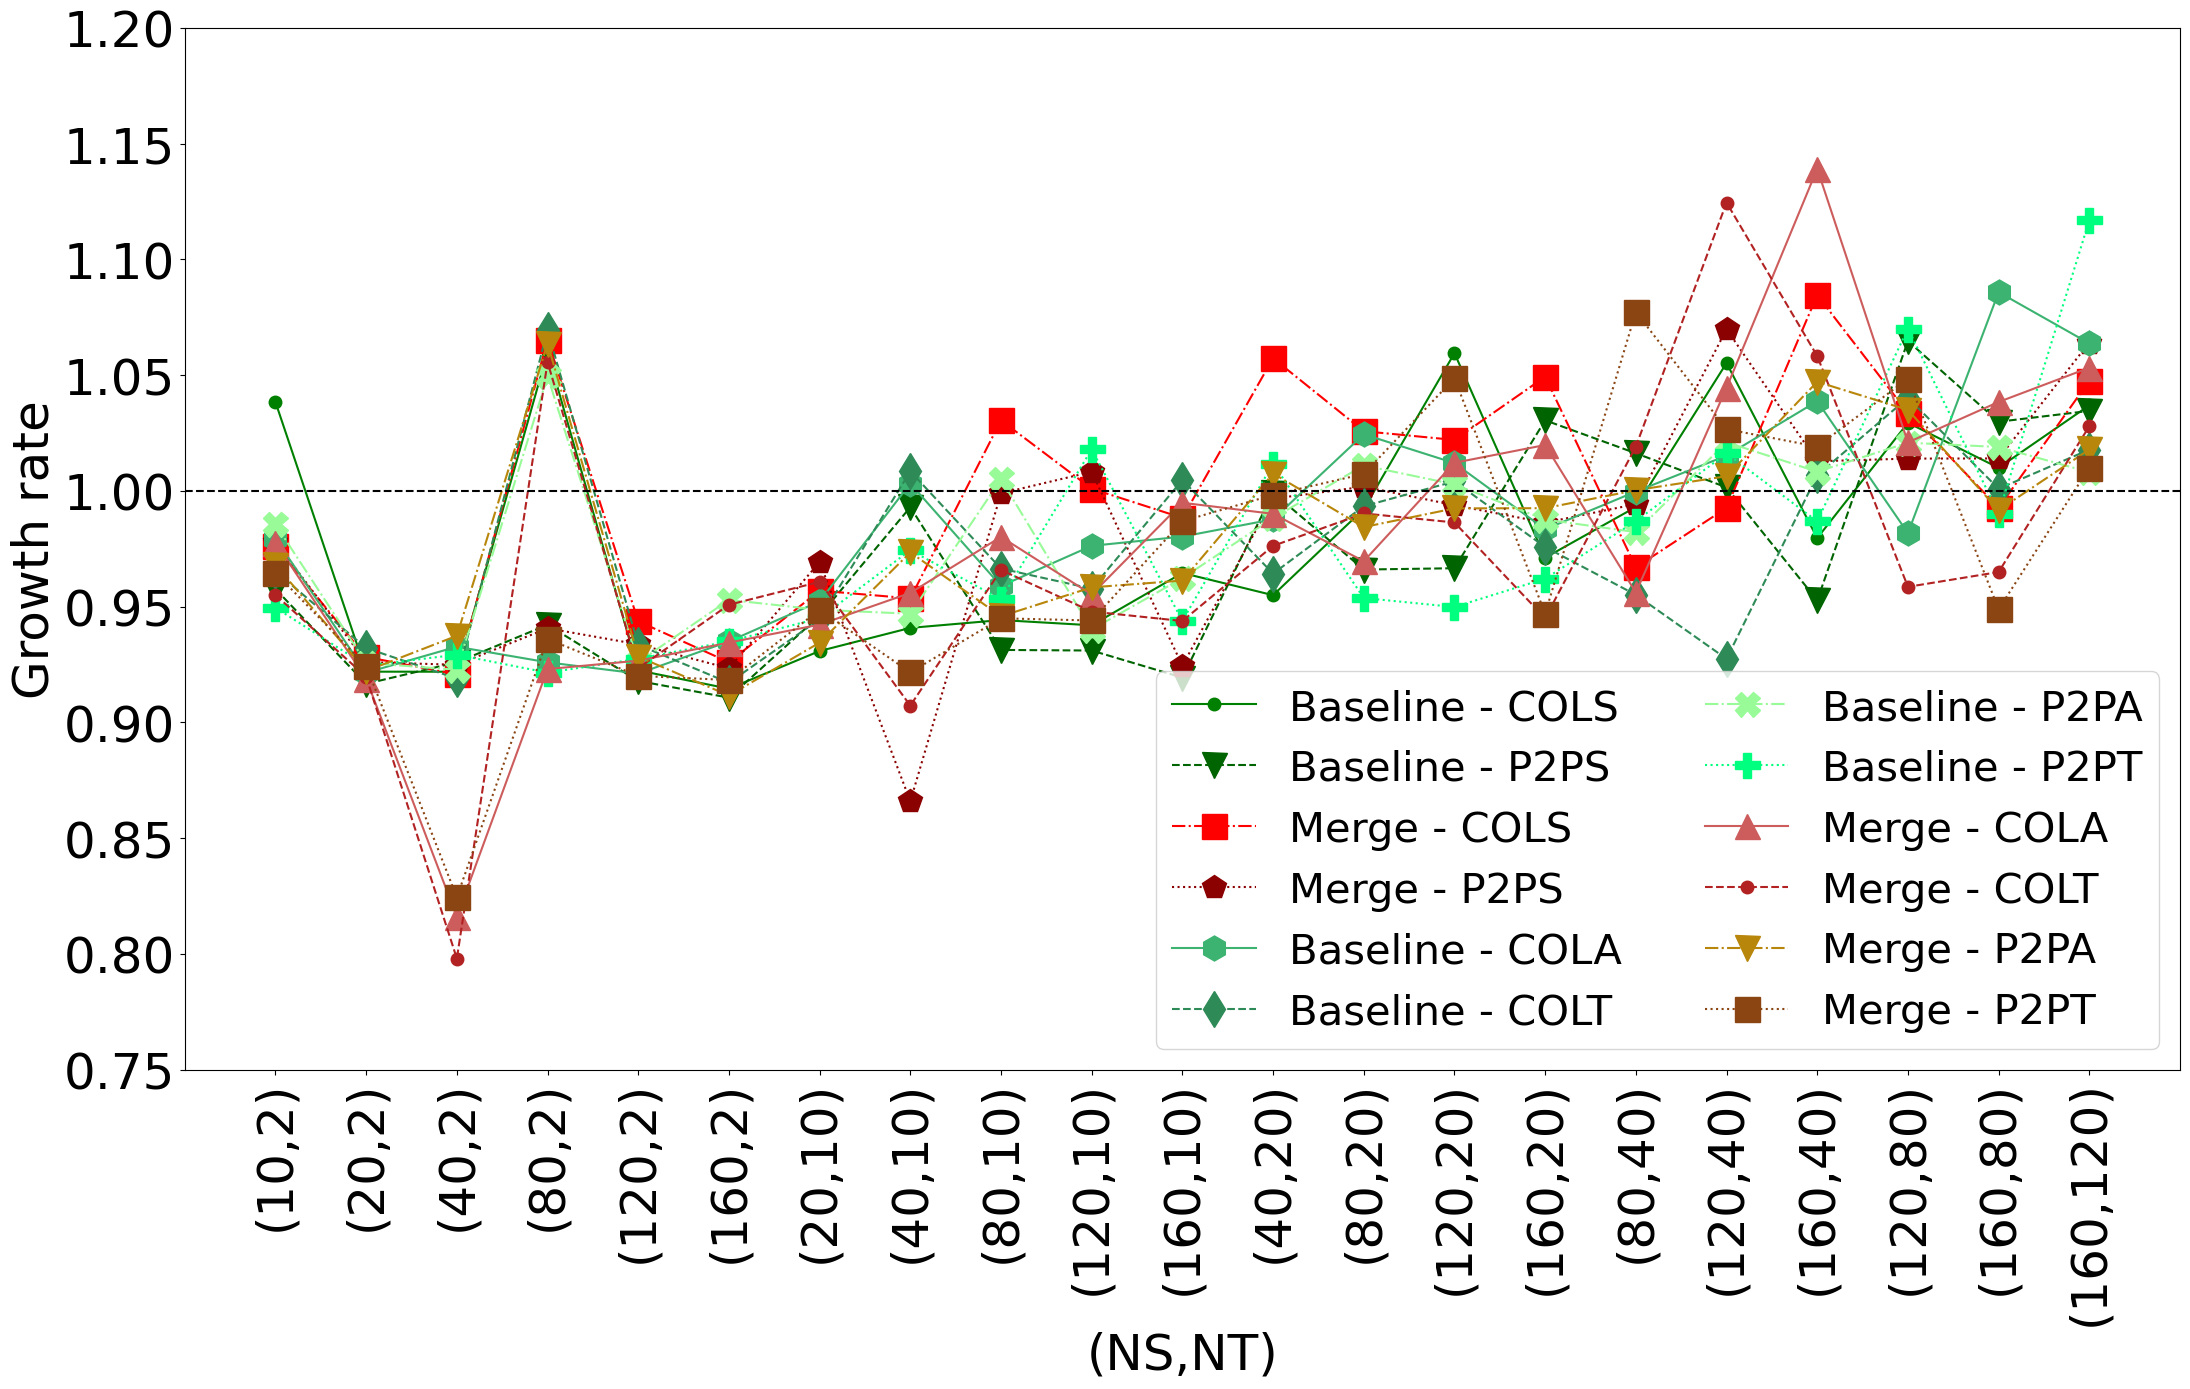

In [20]:
real_arrays = [r_bcols, r_bp2ps, r_mcols, r_mp2ps, r_bcola, r_bcolt, r_bp2pa, r_bp2pt, r_mcola, r_mcolt, r_mp2pa, r_mp2pt]
emul_arrays = [e_bcols, e_bp2ps, e_mcols, e_mp2ps, e_bcola, e_bcolt, e_bp2pa, e_bp2pt, e_mcola, e_mcolt, e_mp2pa, e_mp2pt]


labelsMethods_aux = ['Baseline - COLS', 'Baseline - P2PS',
                    'Merge - COLS','Merge - P2PS',
                    'Baseline - COLA', 'Baseline - COLT','Baseline - P2PA','Baseline - P2PT',
                    'Merge - COLA','Merge - COLT','Merge - P2PA','Merge - P2PT']
colors_m = ( 
    colors.to_rgba("green"), #BCOLS
    colors.to_rgba("darkgreen"), #BP2PS
    colors.to_rgba("red"), #MCOLS
    colors.to_rgba("darkred"),  #MP2PS
    colors.to_rgba("mediumseagreen"), #BCOLA
    colors.to_rgba("seagreen"),  #BCOLT
    colors.to_rgba("palegreen"), #BP2PA
    colors.to_rgba("springgreen"), #BP2PT
    colors.to_rgba("indianred"), #MCOLA 
    colors.to_rgba("firebrick"), #MCOLT
    colors.to_rgba("darkgoldenrod"), #MP2PA
    colors.to_rgba("saddlebrown"), #MP2PT
    )


normalized = []
for index in range(len(real_arrays)):
        aux = np.divide(emul_arrays[index], real_arrays[index])
        print(str(index) + " -- " + labelsMethods_aux[index])
        print(aux)
        normalized.append(aux)

if used_direction == 'e':
    labels_aux = labelsExpand
    name_fig = "RE-Exp-"+extra_name
else:
    labels_aux = labelsShrink
    name_fig = "RE-Shr-"+extra_name
    
print(np.max(normalized))
print(np.min(normalized))

f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
x = np.arange(len(labels_aux))
for index in range(len(normalized)):
    array_aux = normalized[index]
    ax.plot(x, array_aux, color=colors_m[index%len(colors_m)], linestyle=linestyle_m[index%len(linestyle_m)], \
        marker=markers_m[index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])
ax.axhline(y=1, color='black', linestyle='--')

name_legend="Growth rate"
ax.set_xlabel("(NS,NT)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
ax.tick_params(axis='both', which='both', labelsize=36)
ax.set_xticks(x)
ax.set_xticklabels(labels_aux, rotation=90)
ax.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
#plt.ylim([0.55,2.3]) #T_Malleability
plt.ylim([0.75,1.2]) #T_Total
        
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".png", format="png")

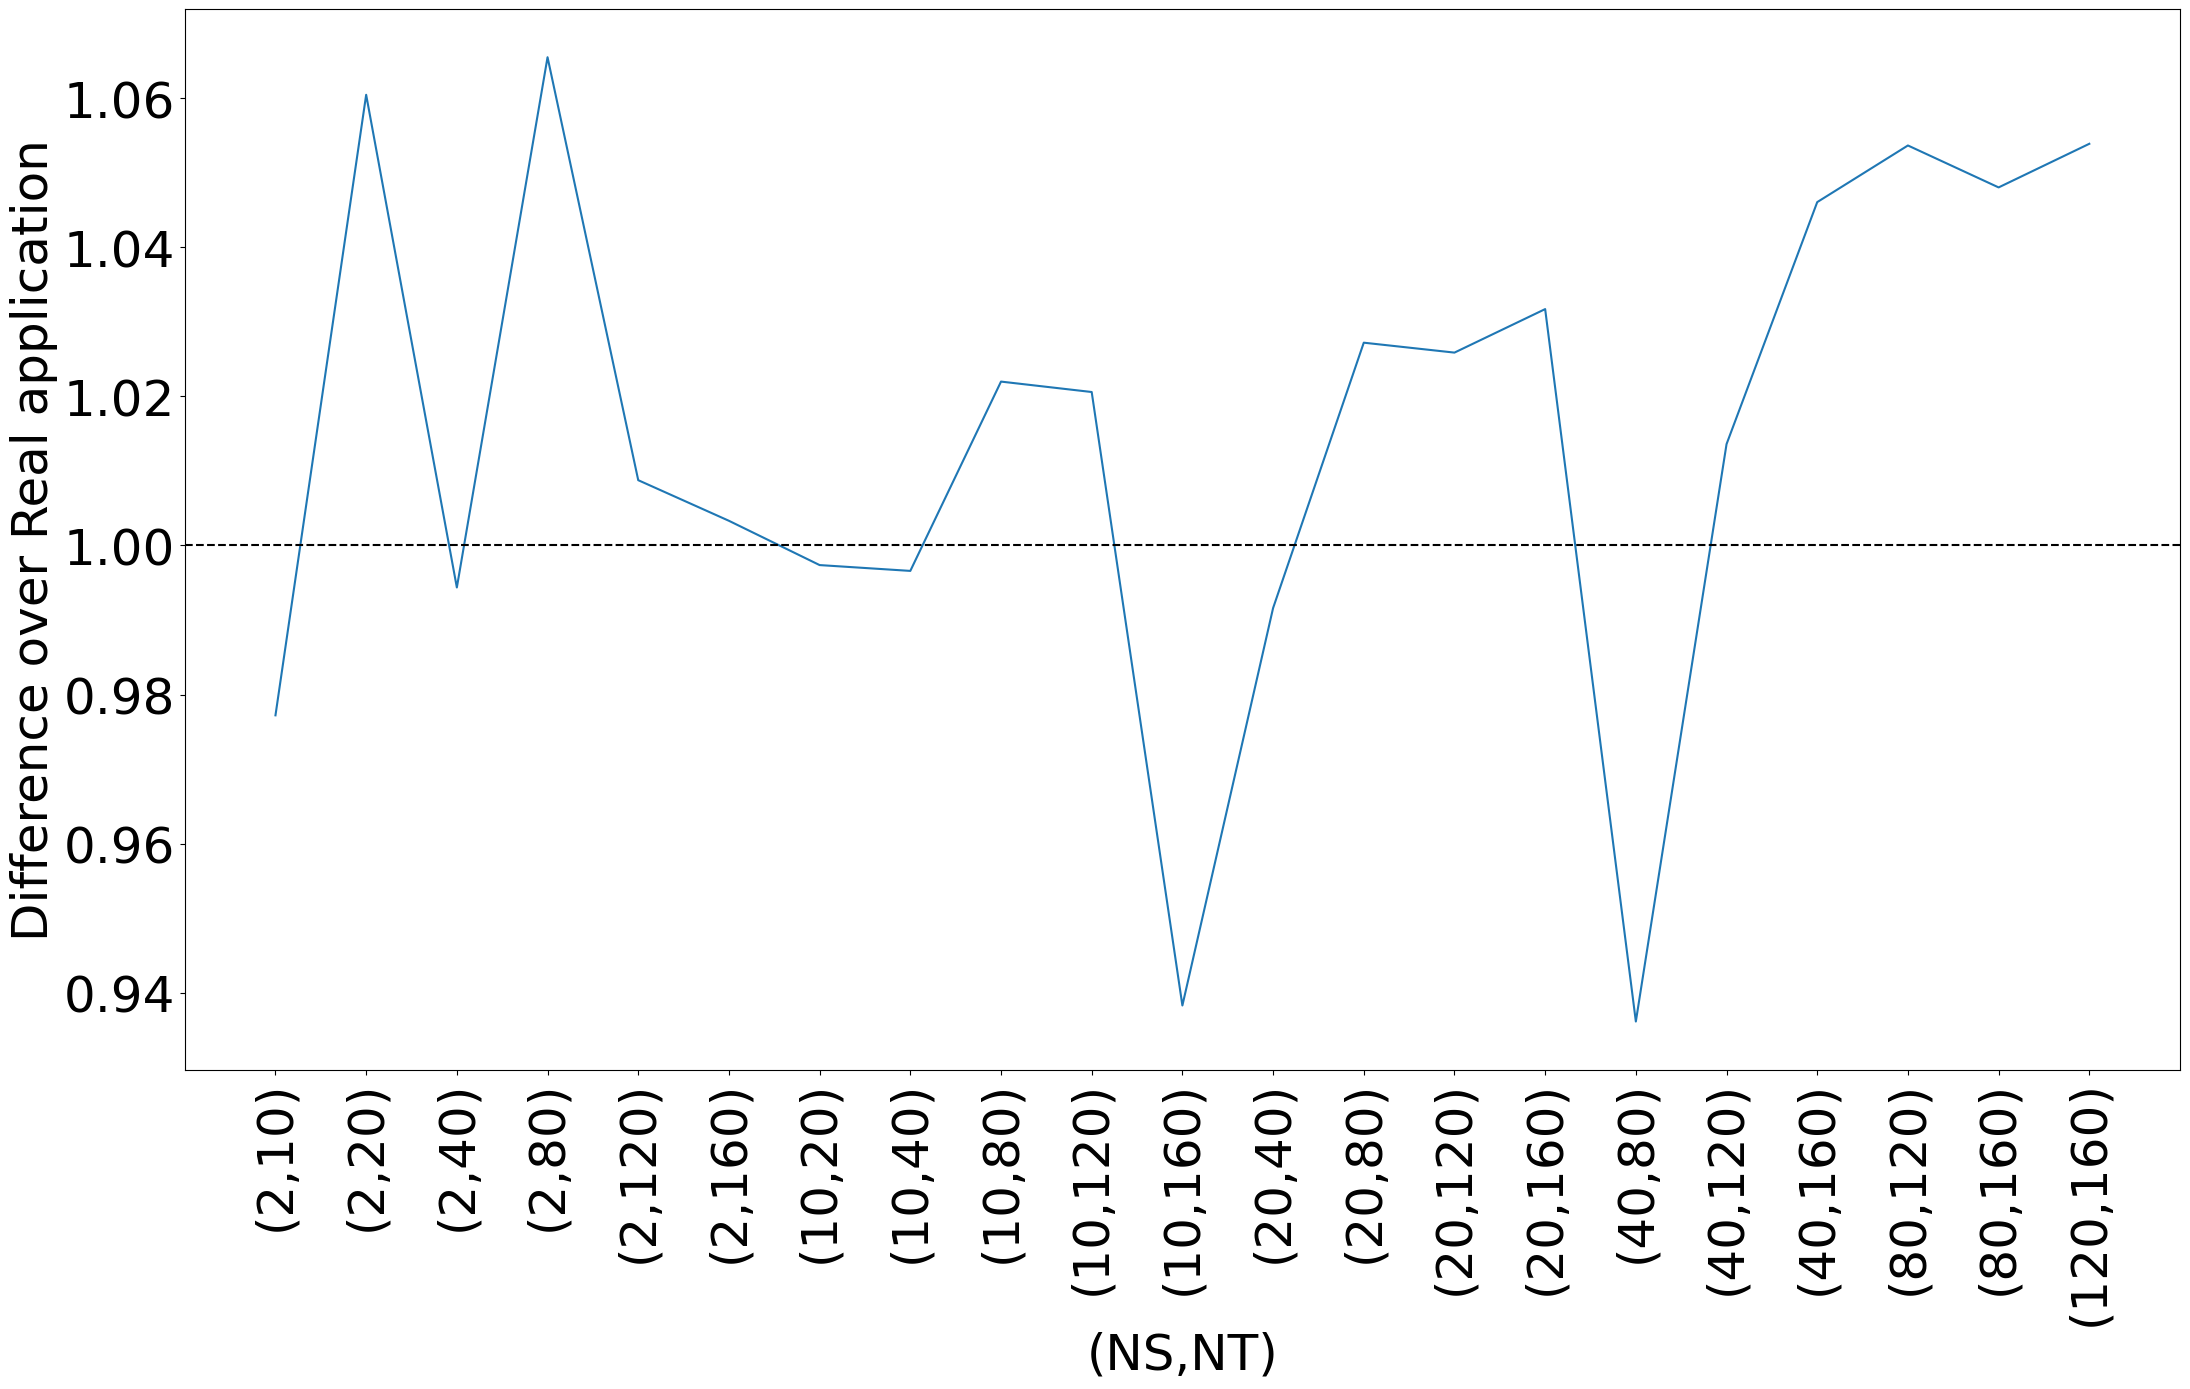

In [36]:
mean_normalized = np.mean(normalized,axis=0)

if used_direction == 'e':
    labels_aux = labelsExpand
    name_fig = "TEST-Exp-"+extra_name
else:
    labels_aux = labelsShrink
    name_fig = "TEST-Shr-"+extra_name
    


f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
x = np.arange(len(labels_aux))
ax.plot(x, mean_normalized, markersize=18)
ax.axhline(y=1, color='black', linestyle='--')

name_legend="Difference over Real application"
ax.set_xlabel("(NS,NT)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
ax.tick_params(axis='both', which='both', labelsize=36)
ax.set_xticks(x)
ax.set_xticklabels(labels_aux, rotation=90)

        
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".png", format="png")

In [21]:
REAL
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[25 18 33 29 10 12 14  8 35 33 38 25]
[ 0  1  2  3  6  7  8  9 10 11]
[ 8  2  7  2  2  1  6  2 10  2]

EMUL
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[28 25 28 35 16 15 17 14 32 36 35 34]
[ 0  1  2  3  8  9 10 11] 
[12  2  1  5  4  4  7  7]